BÉRARD Paul (CS 1A – EDP)

# Modélisation d'un problème de conduction thermique dans une plaque plane par une équation différentielle partielle elliptique de Poisson

## Modélisation physique du phénomène

<img src="Conduction-thermique.jpeg" alt="Image plaque chauffée" style="width: 350px;"/>

*Nota bene : le plan $(xOy)$ est le plan de la plaque délimitée par sa frontière marquée en rouge.*

Il s'agit de modéliser les phénomènes de conduction thermique dans une plaque plane en présence de sources de chaleur de différentes formes, présentées dans la suite. Physiquement, l'équation provient du premier principe de la thermodynamique appliqué à un élément infinitésimal de la plaque entre $t$ et $t+dt$, exprimé sous sa forme opérationnelle pour les phénomènes de diffusion thermique :

\begin{equation}
d^{2}U=\delta^{2} Q_{e} + \delta^{2}Q_{c}
\end{equation}

où $d^{2}U=\mu c d\tau \frac{\partial T}{\partial t}dt$ correspond à la variation d'énergie interne d'un élément de volume $ d\tau $ entre $t$ et $t+dt$, avec $\mu$ la masse volumique de la plaque et $c$ sa capacité thermique massique.

En utilisant la loi de Fourier, on obtient : $\delta^{2} Q_{e}=\lambda \Delta T d\tau dt$, où $\lambda$ représente la conductivité thermique de la plaque. En notant $\sigma$ le terme source de chaleur par unité de temps et de volume, on a : $\delta^{2}Q_{c}=\sigma  d\tau dt$. Finalement, cela donne :

\begin{equation}
\mu c \frac{\partial T}{\partial t}=\lambda \Delta T + \sigma
\end{equation}

## Équations, domaine, paramètres et conditions aux bords

En régime stationnaire, et en considérant les conditions aux bords, on obtient :

\begin{equation}
  \begin{cases}
    -\Delta T(x,y)=\frac{\sigma (x,y)}{\lambda}\mbox{ sur } \Omega\\
    \frac{\partial T}{\partial n}(x,y) = 0 \mbox{ sur } \partial \Omega\\
    T(x,y) = T_{d}(x,y) \mbox{ sur } \partial \Omega
  \end{cases}
\end{equation}

où l'on définit $\Omega\subset\rm I\!R^{2}$ (l'espace occupé par la plaque) tel que $\Omega = \{(x,y)\in \rm I\!R^{2}, x^2+y^2\leq R^2 \}$ : on condidérera donc la plaque circulaire.

On choisit : $\lambda = 200\ W.m^{-1}.K^{-1}$ et $R=20\ cm$.

## Adimensionnement – Formulation variationnelle

On définit les grandeurs adimensionnées :

$x^*=\frac{x}{R}, y^*=\frac{y}{R}, T^*=\frac{T}{T_a}, \sigma^*=\frac{\sigma}{\sigma_0}$ et $\lambda^*=\frac{\lambda T_a}{\sigma_0 R^2}$, où $\sigma_0 = 1\ W.m^{-3}$ et $T_a=298\ K$, la température ambiante, température de la plaque au repos en l'absence de source de chaleur.

Ainsi, $\Omega^* = \{(x,y)\in \rm I\!R^{2}, x^{*2}+y^{*2}\leq 1 \}$ et nos équations adimensionnées s'écrivent : 

\begin{equation}
  \begin{cases}
    -\Delta T^*(x,y)=\frac{\sigma^* (x,y)}{\lambda^*}\mbox{ sur } \Omega^*\\
    \frac{\partial T^*}{\partial n}(x,y) = 0 \mbox{ sur } \partial \Omega^*\\
    T^*(x,y) = \frac{T_{d}(x,y)}{T_a}(=T^*_{d}(x,y)) \mbox{ sur } \partial \Omega^*
  \end{cases}
\end{equation}

Nous omettrons la notation "$*$" dans la suite du document, tout en utilisant les grandeurs adimensionnées définies.

Avec $H=\{f\ \mbox{ continue et  } C^1 \mbox{ par morceaux sur }\Omega \ ; f|_{\partial \Omega}=0\}$, la formulation variationnelle du problème s'écrit :

\begin{equation}
\forall f \in H, \quad \int_{\Omega}\Delta T(x,y) f(x,y)dxdy =-\quad \int_{\Omega}\nabla T(x,y)·\nabla f(x,y)dxdy + \quad \int_{\partial \Omega} \frac{\partial T}{\partial n}(x,y) f(x,y) dxdy
\end{equation}

Soit :

\begin{equation}
\forall f \in H, \quad \int_{\Omega}\nabla T(x,y)·\nabla f(x,y)dxdy= \quad \int_{\Omega} \frac{\sigma(x,y)}{\lambda} f(x,y)dxdy
\end{equation}

## Simulation numérique 1D

Le problème de conduction thermique se simplifie, en 1D, à l'étude d'un segment $[0,R]$ soumis à une source de chaleur $\sigma$. L'équation se simplifie en :

\begin{equation}
    -\frac{d^{2} T}{dx^2}=\frac{\sigma (x)}{\lambda}\mbox{ sur } [0,1]\\
\end{equation}

On supposera en outre que $T(0)=T(1)=0$ (signifiant physiquement $T(0)=T(R)=0$).

On choisit dans cet exemple $\sigma$ uniforme sur $[0,1]$ et tel que $\sigma=10 000$. Ainsi, on obtient :

\begin{equation}
    T(x)=-\frac{\sigma}{\lambda}x^2=-50x^2\mbox{ sur } [0,1]\\
\end{equation}

### Résolution et visualisation de la solution

<p style="color:green;"> Modules </p>

In [385]:
from dolfin import *
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt

<p style="color:green;"> Constantes utilisées </p>

In [386]:
Lambda = 500
sigma = 10000
tol = 1E-14
X = 1 

<p style="color:green;"> Maillage </p>

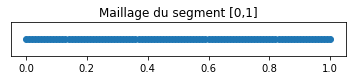

In [387]:
nx1 = 100

mesh1 = UnitIntervalMesh(nx1)

plt.figure(1)
plot(mesh1, title="Maillage du segment [0,1]")

<p style="color:green;"> Définition de l'espace Hh dans lequel on cherche la solution </p>

In [388]:
Hh1 = FunctionSpace(mesh1, 'P', 1)

<p style="color:green;"> Conditions aux limites </p>

In [389]:
class DirichletBoundary1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0])<tol or abs(x[0]-1)<tol) 

D_boundary = DirichletBoundary1()

Dirichlet_limite = DirichletBC(Hh1,Constant(1),D_boundary)

<p style="color:green;"> Formulation variationnelle </p>

In [390]:
T1 = TrialFunction(Hh1)
f1 = TestFunction(Hh1)
md1 = sigma*f1/Lambda*dx
i1 = inner(grad(T1),grad(f1))*dx

<p style="color:green;"> Résolution de l'approximation variationnelle </p>

In [391]:
T1 = Function(Hh1)
solve(i1 == md1, T1, Dirichlet_limite)

<p style="color:green;"> Tracé de la solution </p>

Text(0, 0.5, 'T/T$_a$')

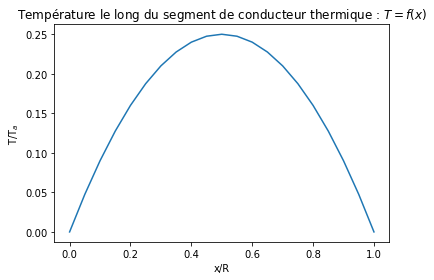

In [392]:
plt.figure(2)
plot(u1,title='Température le long du segment de conducteur thermique : $T=f(x)$')
plt.xlabel('x/R')
plt.ylabel('T/T$_a$')

## Simulation numérique 2D

Il s'agit ici de visualiser, par le biais d'une simulation sur FENICS, le profil de la température sur la plaque en fonction du point $(x,y)$ sur celle-ci. On considère deux cas : une source de chaleur de forme gaussienne centrées en un point de coordonnées $(x_{\sigma},y_{\sigma})$ donné, et une source de chaleur uniforme.

On pourra représenter l'allure de la température sur la plaque par la colorisation du disque représentant la plaque définie par $(x,y)\in \Omega \mapsto T(x,y)$, où la couleur correspondra à la valeur de la température en un point donné de la plaque conductrice.

<p style="color:green;"> Constantes et géométrie </p>

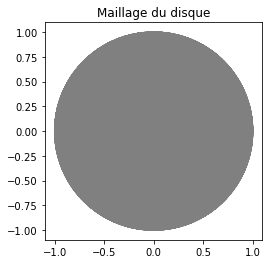

In [393]:
from mshr import *  # À installer avec la commande conda install -c conda-forge mshr

r = 1
Lambda = 1
sigma = 100
 
A = 9
Rc = 0.4
# Source de chaleur non uniforme
sigma_2 = Expression('10*exp(-pow(A,2)*(pow(x[0]-2*Rc, 2) + pow(x[1]-Rc, 2)))', A=A, Rc=Rc, degree = 2)

tol = 1E-3
nx2=100

disque = Circle(Point(0,0),r)
mesh2 = generate_mesh(disque, nx2)

plt.figure(1)
plot(mesh2, title="Maillage du disque")

<p style="color:green;">  Définition de l'espace Hh dans lequel on cherche la solution </p>

In [394]:
Hh2 = FunctionSpace(mesh2, 'P', 2)

<p style="color:green;"> Conditions aux limites </p>

In [395]:
class Circle_Condition_Dirichlet(SubDomain):
    def inside(self, x, on_boundary):
        oncircle = x[0]**2 + x[1]**2 
        return on_boundary and oncircle > (r-0.1)**2

D_boundary_circle = Circle_Condition_Dirichlet()

Dirichlet_Cercle = DirichletBC(Hh2, Constant(0), D_boundary_circle)

<p style="color:green;">  Formulation variationnelle </p>

In [396]:
T2 = TrialFunction(Hh2)
f2 = TestFunction(Hh2)
md2 = sigma*f2/Lambda*dx
i2 = inner(grad(T2),grad(f2))*dx

# Pour une source de chaleur gaussienne localisée
md2_2 = sigma_2*f2/Lambda*dx

<p style="color:green;">  Résolution de l'approximation variationnelle </p>

In [397]:
T2 = Function(Hh2)
solve(i2== md2, T2, Dirichlet_Cercle)

# Pour une source de chaleur gaussienne localisée
T2_2 = Function(Hh2)
solve(i2 == md2_2, T2_2, Dirichlet_Cercle)

<p style="color:green;"> Tracé des solutions selon la forme de la source de chaleur  </p>

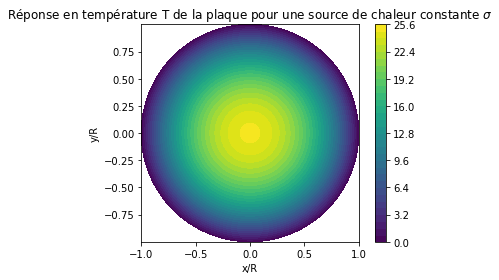

In [398]:
plt.figure(2)
plT=plot(T2)
plt.title('Réponse en température T de la plaque pour une source de chaleur constante $\sigma$')
plt.xlabel('x/R')
plt.ylabel('y/R')
plt.colorbar(plT)

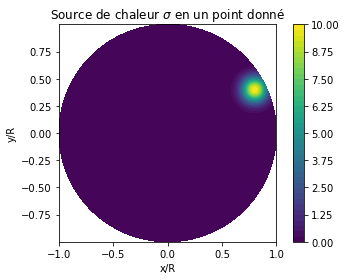

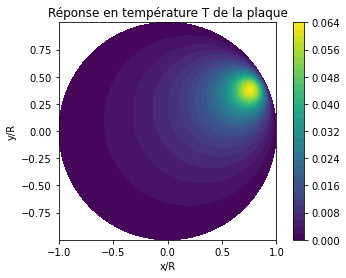

In [399]:
plt.figure(3)
sigma_2 = interpolate(sigma_2, Hh2)
plT_sigma = plot(sigma_2, title='Source de chaleur $\sigma$ en un point donné')
plt.xlabel('x/R')
plt.ylabel('y/R')
plt.colorbar(plT_sigma)


plt.figure(4)
plT_2=plot(T2_2)
plt.title('Réponse en température T de la plaque')
plt.xlabel('x/R')
plt.ylabel('y/R')
plt.colorbar(plT_2)

## Simulation numérique 2D avec des sources aléatoirement distribuées et une conductivité thermique $\lambda$ aléatoire 

Il s'agit à présent de modéliser le problème en y intégrant une composante aléatoire. On va, pour cela, appliquer à la plaque une source de chaleur uniforme mais de valeur aléatoire suivant une loi gaussienne centrée en $10 000$ et d'écart-type $1 000$.

Pour donner un caractère aléatoire à la conductivité thermique $\lambda$, on va la définir par morceaux en faisant une partition du disque représentant la plaque plane conductrice. Dans chaque partie ainsi définie, $\lambda \hookrightarrow \mathcal{U([200,2000])}$.

<p style="color:green;"> Constantes </p>

In [448]:
tol = 1E-1
nx3 = 300
r = 1

<p style="color:green;"> Maillage</p>

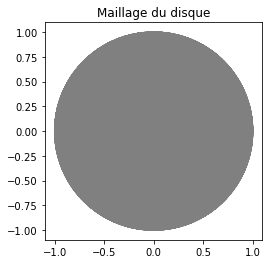

In [449]:
disque = Circle(Point(0,0),r)
mesh3 = generate_mesh(disque, nx3)

plt.figure(1)
plot(mesh2, title="Maillage du disque")

<p style="color:green;"> Définition de la source de chaleur aléatoire </p>

In [450]:
from numpy import *

sigma = random.normal(10000,1000)

<p style="color:green;"> Définition aléatoire de $\lambda$ dans chacune des parties du disque</p>

Calling FFC just-in-time (JIT) compiler, this may take some time.


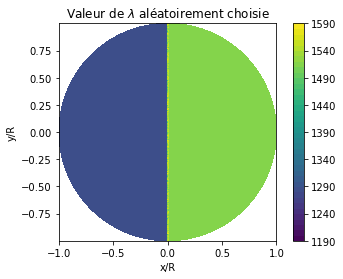

In [464]:
x = SpatialCoordinate(mesh3)

lambda1=random.uniform(200,2000)
lambda2=random.uniform(200,2000)

Lambda=conditional(lt(x[0], Constant(0)),lambda1,lambda2)

plL=plot(Lambda,title='Valeur de $\lambda$ aléatoirement choisie')
plt.xlabel('x/R')
plt.ylabel('y/R')
plt.colorbar(plL)

<p style="color:green;">  Définition de l'espace Hh dans lequel on cherche la solution </p>

In [452]:
Hh3 = FunctionSpace(mesh3, 'P', 2)

<p style="color:green;">  Conditions aux limites </p>

In [453]:
class Circle_Condition_Dirichlet(SubDomain):
    def inside(self, x, on_boundary):
        oncircle = x[0]**2+ x[1]**2 # Passage en coordonnées polaires 
        return on_boundary and oncircle>(r-0.1)**2

D_boundary_circle = Circle_Condition_Dirichlet()

Dirichlet_Cercle = DirichletBC(Hh3, Constant(0), D_boundary_circle)

<p style="color:green;">  Formulation variationnelle </p>

In [454]:
T3 = TrialFunction(Hh3)
f3 = TestFunction(Hh3)
md3 = sigma*f3/Lambda*dx
i3 = inner(grad(T3),grad(f3))*dx

<p style="color:green;">  Résolution de l'approximation variationnelle </p>

In [455]:
T3 = Function(Hh3)
solve(i3== md3, T3, Dirichlet_Cercle)

Calling FFC just-in-time (JIT) compiler, this may take some time.


<p style="color:green;"> Tracé de la solution </p>

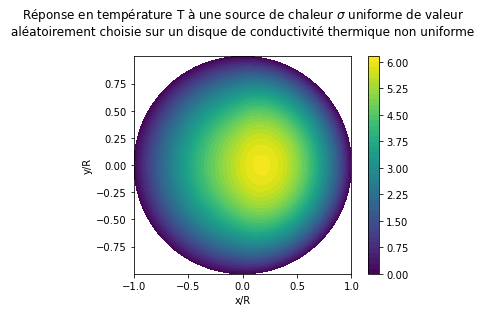

In [463]:
plt.figure(5)
plT=plot(T3)
plt.title('Réponse en température T à une source de chaleur $\sigma$ uniforme de valeur \n aléatoirement choisie sur un disque de conductivité thermique non uniforme \n')
plt.xlabel('x/R')
plt.ylabel('y/R')
plt.colorbar(plT)

## Conclusion

Ainsi, le problème de la conduction thermique dans une plaque plane en régime stationnaire s'inscrit dans les problèmes régis par une EDP elliptique et des simulations sur FENICS permettent de mieux appréhender les phénomènes en jeu.

La première simulation s'intéresse au cas simple à une dimension pour comprendre intuitivement le lien entre l'équation (avec sa résolution) et la réalité physique du phénomène.

La seconde simulation, en deux dimensions, permet de généraliser cette étude à une plaque circulaire à laquelle on applique une source de chaleur soit localisée en un point donné, soit uniforme sur la plaque pour observer la répartition de la chaleur dans la plaque via différentes représentations visuelles simples à appréhender et permettant de faire le lien avec la réalité physique.

La dernière simulation, avec sa composante aléatoire, étudie ce même phénomène avec une source de chaleur uniforme de valeur aléatoire (suivant une loi normale) ainsi qu'une conductivité thermique aléatoire et non uniforme sur la plaque : elle définie par morceaux et on observe que la plaque est plus chaude dans la zone de haute conductivité thermique que dans la zone de plus basse conductivité thermique (alors que la source de chaleur appliquée est uniforme), ce qui est physiquement satisfaisant.

## Sources utilisées

N. POINT et J.-H. SAIAC : *Équations aux dérivées partielles – Mathématiques et méthodes numériques*, ESPCI 


B. GIBERT : *Étude expérimentale de la diffusion thermique dans les monocristaux d’olivine et dans les roches du manteau supérieur*, Université Montpellier II